In [1]:
%run functions.ipynb

np.set_printoptions(precision=3)
np.random.seed(42)

%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
X_train, X_test, y_train, y_test = load_train_and_test_parts()
print("Train and test sizes: {} {}".format(X_train.shape, X_test.shape))
print(
    "(1, 0) labels count in train test: {} {}".format(
        (np.count_nonzero(y_train == 1), np.count_nonzero(y_train == 0)),
        (np.count_nonzero(y_test == 1), np.count_nonzero(y_test == 0)),
    )
)
standarizer = StandardScaler().fit(X_train)
X_std_train = standarizer.transform(X_train)
X_std_test = standarizer.transform(X_test)

Train and test sizes: (726, 12179) (243, 12179)
(1, 0) labels count in train test: (289, 437) (104, 139)


In [44]:
singular = PCA().fit(X_std_train).singular_values_

726


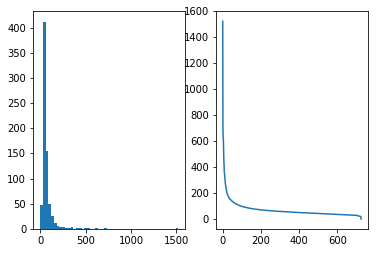

In [45]:
eigen = singular
print(len(eigen))
plt.figure()
plt.subplot(121)
plt.hist(eigen, bins=50)
plt.subplot(122)
plt.plot(np.arange(len(eigen)), eigen)
plt.show()

Doesn't look like Wigner semicircle distribution -> doesn't look like random matrix at all

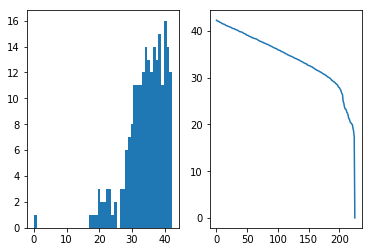

In [46]:
ind = 500
trunc_eigen = eigen[ind:]
plt.figure()
plt.subplot(121)
plt.hist(trunc_eigen, bins=50)
plt.subplot(122)
plt.plot(np.arange(len(trunc_eigen)), trunc_eigen)
plt.show()

In [54]:
spca = SPCWrapper(max_iter=100, n_components=1000, threshold_val=0.1).fit(X_std_train)
loadings = spca.V

In fact not that sparse

0.9204584190327161


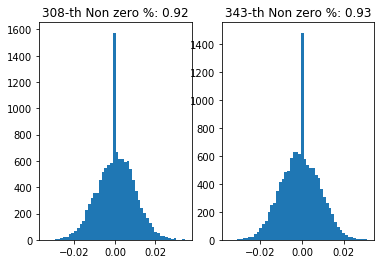

In [68]:
print(np.count_nonzero(loadings) / (X_train.shape[0]*X_train.shape[1]))

ind1 = np.random.randint(0, X_train.shape[0])
ind2 = np.random.randint(0, X_train.shape[0])

plt.figure()
plt.subplot(121)
plt.hist(loadings[ind1, :], bins=50)
plt.title('{}-th Non zero %: {:.2f}'.format(ind1, np.count_nonzero(loadings[ind1,:])/X_train.shape[1]))

plt.subplot(122)
plt.hist(loadings[ind2, :], bins=50)
plt.title('{}-th Non zero %: {:.2f}'.format(ind2, np.count_nonzero(loadings[ind2,:])/X_train.shape[1]))
plt.show()